# **Keras Workshop 1**

Machine Learning

**Name: Rosalinda Muñoz Gámez**

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

October 20th, 2024

El objetivo de este ejercicio es implementar una red neuronal multicapa, únicamente para clasificar los dígitos 0 y 1 de la base de datos MNIST.

__Objetivos:__
* Implementar una red neuronal en Keras, para un problema de clasificación binaria.
* Aprender el uso de la función de pérdida 'binary_crossentropy'.
* Experimentar con distintos métodos de optimización.
* Experimentar con distintas funciones de activación.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

from pandas import DataFrame
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# colectar los dígitos 0 y 1
tr0 = np.where(train_labels==0)[0]
tr1 = np.where(train_labels==1)[0]
ts0 = np.where(test_labels==0)[0]
ts1 = np.where(test_labels==1)[0]
tr_idx = np.hstack([tr0, tr1])
ts_idx = np.hstack([ts0, ts1])

# nuevo sub-conjunto de datos
train_images = train_images[tr_idx]
train_labels = train_labels[tr_idx]
test_images = test_images[ts_idx]
test_labels = test_labels[ts_idx]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('train images shape:', train_images.shape)
print('train labels shape:', train_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

train images shape: (12665, 28, 28)
train labels shape: (12665,)
test images shape: (2115, 28, 28)
test labels shape: (2115,)


Ahora, el conjunto sólo tiene 12665 datos de entrenamiento, y 2115 datos de prueba.


In [ ]:
# pre-procesamiento de los datos
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Diseño de la red

__Ejercicio:__ Diseñe una red neuronal con varias capas ocultas, más una capa de salida (como en la figura). Las capas deben ser densas.

¿Cuántas neuronas debe tener la capa de salida?

Experimente con diferente número de capas (no demasiadas, entre 1 y 5).

Experimente con diferente número de neuronas en las capas ocultas (puede usar potencias de 2 si lo prefiere).

Experimente con diferentes funciones de activación en las capas ocultas (e.g. 'relu', 'tanh', 'sigmoid', None).

Por ser clasificación binaria, en la capa de salida puede usar la activación 'sigmoid'. Si lo desea, puede experimentar con otras funciones de activación.

In [105]:
### START CODE HERE ###
network = models.Sequential()

network.add(layers.Dense(units=256, activation='relu', input_shape=data_shape, name='dense0'))

network.add(layers.Dense(units=128, activation='relu', name='dense1'))

network.add(layers.Dense(units=64, activation='relu', name='dense2'))

network.add(layers.Dense(units=32, activation='relu', name='dense3'))

network.add(layers.Dense(units=2, activation='sigmoid', name='out'))
### END CODE HERE ###


In [106]:
network.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense0 (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out (Dense)                          │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,258 (954.13 KB)

 Trainable params: 244,258 (954.13 KB)

 Non-trainable params: 0 (0.00 B)

__Ejercicio:__ Compile y entrene la red neuronal. Como es un problema de clasificación binaria (0 ó 1), utilice como función de pérdida 'binary_crossentropy'

Utilice el optimizador 'RMSprop' con un learning rate apropiado. Consulte la documentación de Keras y utilice otros optimizadores (e.g. 'sgd', 'adam', 'adagrad', 'adadelta', 'adamax').

Experimente cambiando diferentes valores para learning rate (e.g. 0.1, 0.05, 0.01, ...) Estos valores pueden cambiar, dependiendo del optimizador que se use.

Experimente cambiando tamaños de batch entre 1 y 256 (se sugiere usar potencias de 2).

Finalmente, compare sus modelos y determine cuál tiene el menor error de clasificación (mayor accuracy).

In [107]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.RMSprop(learning_rate = 0.001)
network.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['acc'])
### END CODE HERE ###


### START CODE HERE ### (≈ 3 lines of code)
tic = time()
history = network.fit(train_images, train_labels, epochs = 10, batch_size = 256, validation_split = 0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.9197 - loss: 0.1811 - val_acc: 0.9995 - val_loss: 0.0037
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9972 - loss: 0.0104 - val_acc: 0.9986 - val_loss: 0.0044
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9986 - loss: 0.0040 - val_acc: 0.9995 - val_loss: 0.0014
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9991 - loss: 0.0037 - val_acc: 0.9991 - val_loss: 0.0031
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9996 - loss: 0.0023 - val_acc: 0.9995 - val_loss: 0.0016
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9997 - loss: 0.0016 - val_acc: 0.9986 - val_loss: 0.0035
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9999 - loss: 4.9519e-04 - val_acc: 0.9991 - val_loss: 0.0022
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9999 - loss: 5.5012e-04 - val_acc: 0.9991 - val_loss: 0.0022
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc

### Ver el historial de desempeño de la red


In [108]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

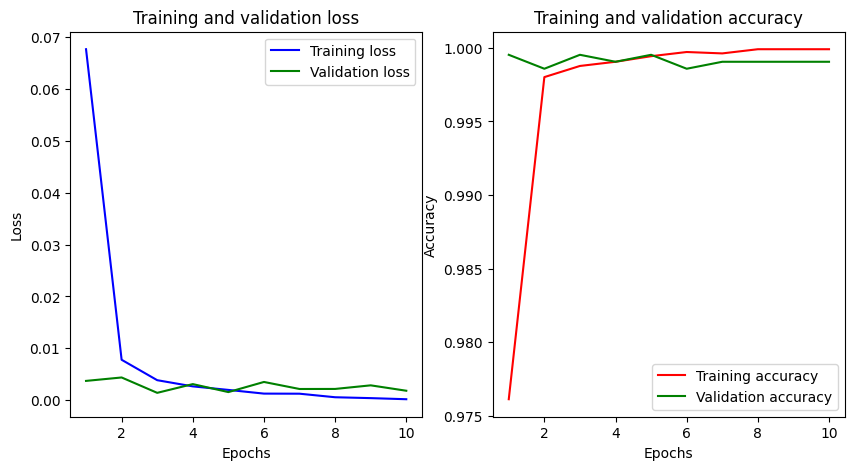

In [109]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [110]:
results = network.evaluate(test_images, test_labels)
print('results loss:', results[0])
print('results accuracy:', results[1])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9996 - loss: 0.0027
results loss: 0.003346203127875924
results accuracy: 0.9995272159576416


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


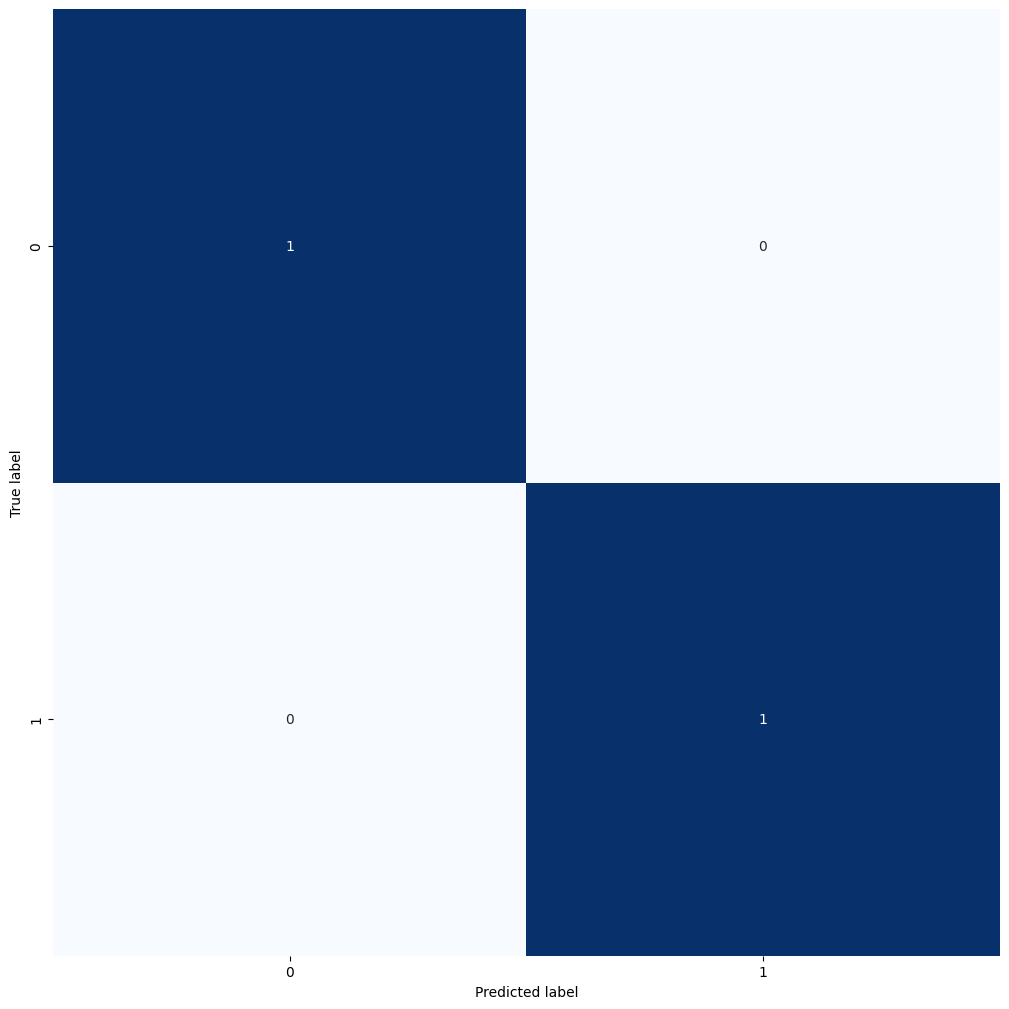

In [115]:
pred = network.predict(test_images)
predictions = np.argmax(pred, 1)

test_labs = np.argmax(test_labels, 1)
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Conclusion**

The exercise of compiling and training a neural network for a binary classification problem using various optimizers, learning rates, and batch sizes highlighted several key aspects of machine learning model training. The choice of optimizer significantly impacts the model's convergence and performance; in this exercise, optimizers such as RMSprop, Adam, SGD, and Adagrad were compared, demonstrating that different optimizers have advantages depending on the problem's nature, model architecture, and data quality. Experimenting with learning rates revealed that an appropriate value can accelerate convergence, while excessively high values may lead to unstable training. Additionally, adjusting the batch size influenced both training time and learning stability, where smaller batch sizes often led to noisier training but potentially better minima in the loss function, while larger sizes provided more stable gradient estimates.